In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import missingno as msno
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r"C://Users//user//Downloads//Vehicle Insurance  kaggle dataset.csv")

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
#pip install  missingno

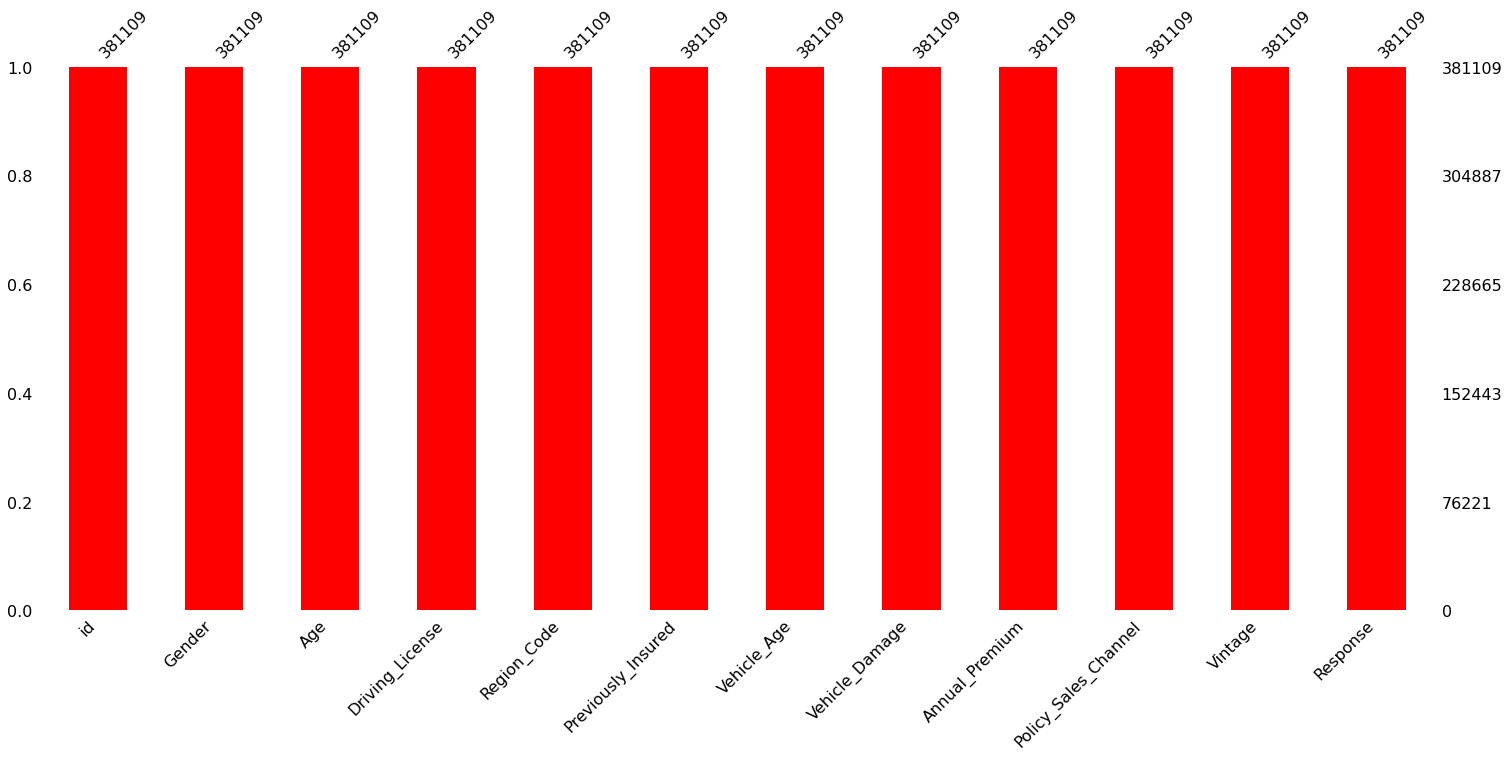

In [6]:
n = msno.bar(df,color="Red")

# EDA

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


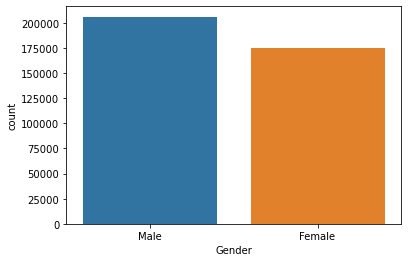

In [7]:
sns.countplot("Gender",data=df)
plt.show()

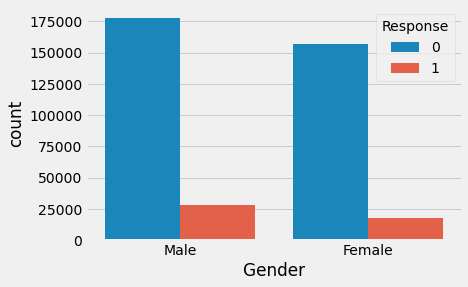

In [8]:
plt.style.use("fivethirtyeight")
sns.countplot(x = "Gender",data = df,hue = "Response")
plt.show()

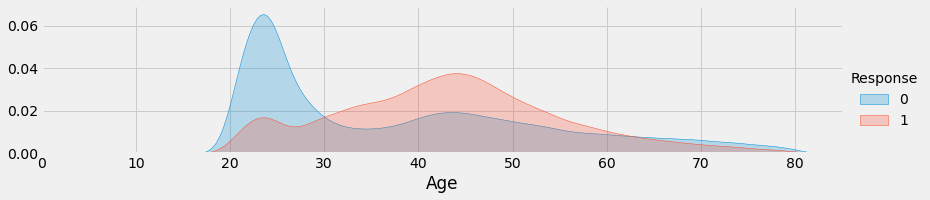

In [9]:
facet = sns.FacetGrid(df,hue="Response",aspect = 4)
facet.map(sns.kdeplot,"Age",shade = True)
facet.set(xlim = (0,df["Age"].max()))
facet.add_legend()
plt.show()

In [10]:
#Observation:

##Here we can see that, people ages between 39 to 50 are most likely to Response
##People ages between 20 to 30 are most likely to Not Response

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


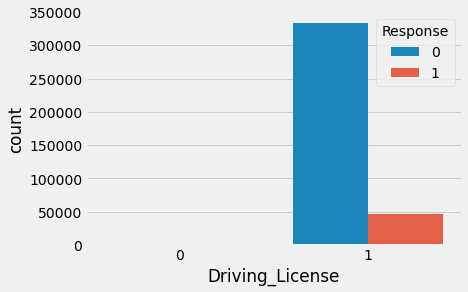

In [11]:
sns.countplot("Driving_License",data = df,hue = "Response")
plt.show()

In [12]:
df["Response"].value_counts()


0    334399
1     46710
Name: Response, dtype: int64

In [13]:
##Observation:

#Number of People not having Driving License is very Small
##The number of Response is very small compared to Not Resonse

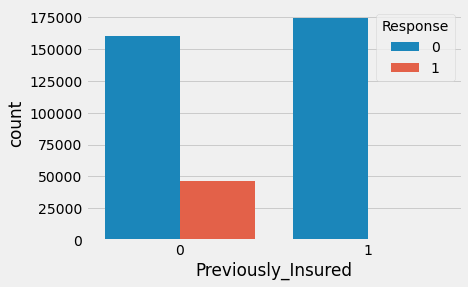

In [14]:
sns.countplot(x = "Previously_Insured",data = df,hue = "Response")
plt.show()

In [15]:
df.groupby("Response")["Previously_Insured"].value_counts()


Response  Previously_Insured
0         1                     174470
          0                     159929
1         0                      46552
          1                        158
Name: Previously_Insured, dtype: int64

In [16]:
##Observation:

##The people who were previously insured,i think they loose their interest of insured again,so there is a small number of people to Response
##The people who were not previously Insured ,there is certain number of people who are going to response

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


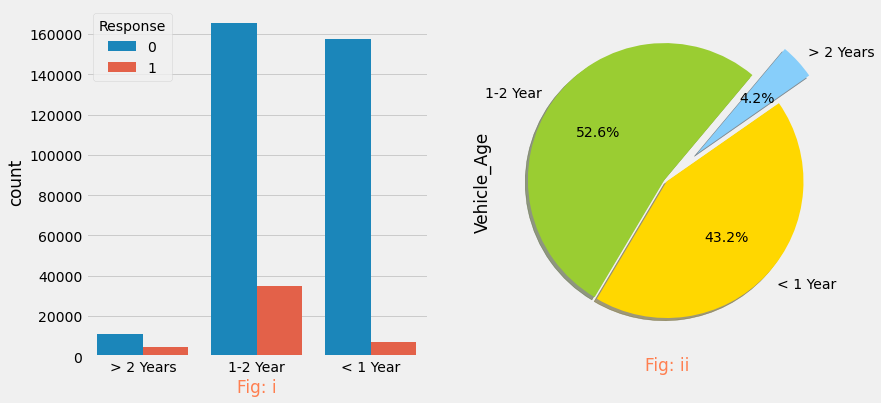

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot("Vehicle_Age", data = df,hue = "Response")
plt.xlabel("Fig: i",color="coral")
plt.subplot(1,2,2)
plt.rcParams['figure.figsize']=(6,8)
color = ['yellowgreen','gold',"lightskyblue"]
df['Vehicle_Age'].value_counts().plot.pie(y="Vehicle_Age",colors=color,explode=(0.02,0,0.3),startangle=50,shadow=True,autopct="%0.1f%%")
plt.axis('on')
plt.xlabel("Fig: ii",color="coral")
plt.show()


In [18]:
#Observation (Fig: i):

##People having Cars with age between 1-2 years are most likely to Response
##People having Cars with age greater than 2 years are less likely to response

##Observation (Fig: ii):
#52.6% of the dataset contains cars with ages between 1-2 years
##43.2% of the dataset contains cars with ages less than 1 years
##4.2% of the dataset contains cars with ages greater than 2 years

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


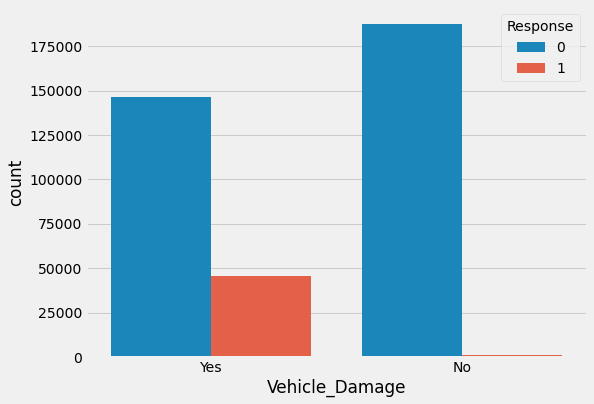

In [19]:
plt.figure(figsize=(8,6))
sns.countplot("Vehicle_Damage", data = df,hue = "Response")
plt.show()

In [20]:
##Observation:

#People having their Vehicle damaged in the past are most likely to Response ("Experience speaks the Most" :They know the Consequences)
#People not having their Vehicle damaged in the past are most likely to not Response

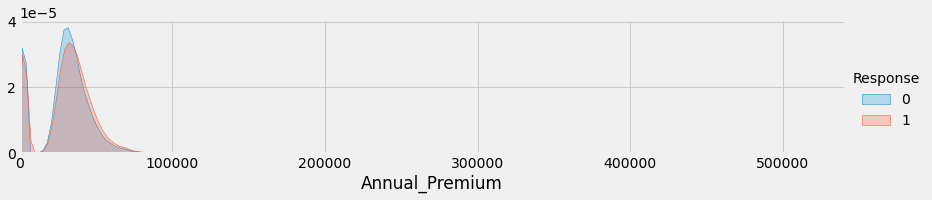

In [21]:
facet = sns.FacetGrid(df,hue="Response",aspect = 4)
facet.map(sns.kdeplot,"Annual_Premium",shade = True)
facet.set(xlim = (0,df["Annual_Premium"].max()))
facet.add_legend()
plt.show()


In [22]:
##Observation:

##According to Annual Premium the number of Response and not Response is the same
##Insurense with Annual premium less than 800,000 is most likely to respond

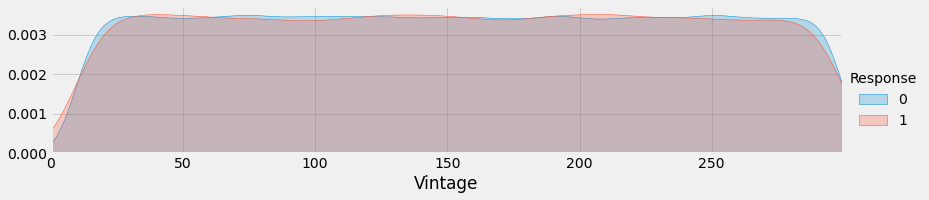

In [23]:
facet = sns.FacetGrid(df,hue="Response",aspect = 4)
facet.map(sns.kdeplot,"Vintage",shade = True)
facet.set(xlim = (0,df["Vintage"].max()))
facet.add_legend()
plt.show()

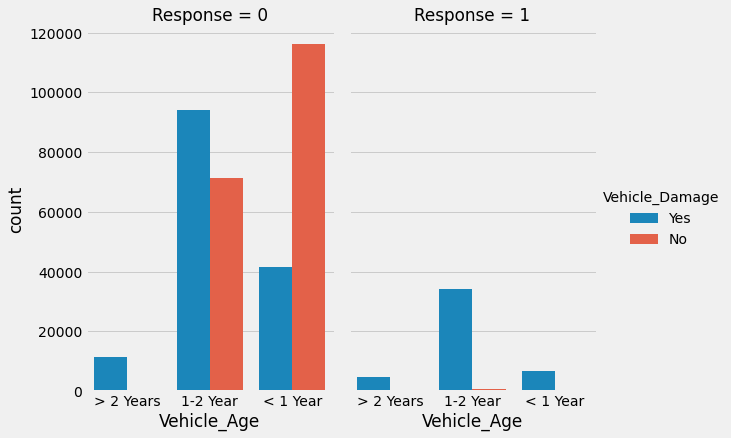

In [24]:
sns.catplot(x="Vehicle_Age", hue="Vehicle_Damage", col="Response",
                data=df, kind="count",
                height=6, aspect=.7)
plt.show()

In [25]:
#Observation:

##People Having vehicle Damage, vehicle with any age are most likely to Respond, so we can say that Vehicle Damage is the primary factor to Respond

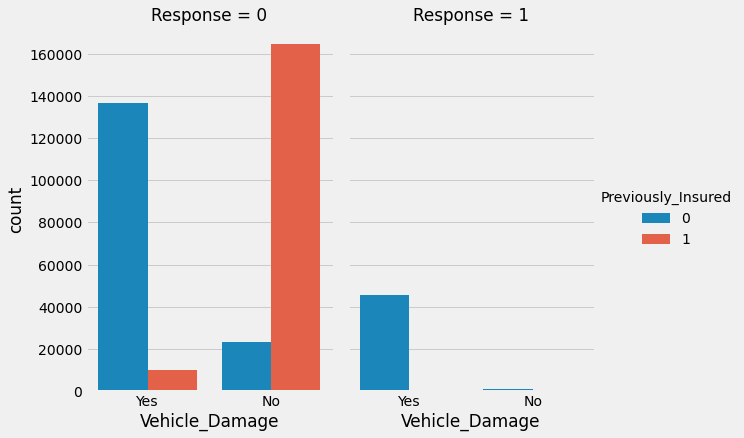

In [26]:
sns.catplot(x="Vehicle_Damage", hue="Previously_Insured", col="Response",
                data=df, kind="count",
                height=6, aspect=.7)
plt.show()

In [27]:
##Observation:

##People who were not previously insured are most likely to response after having Vehicle Damage
##People who were previously insured and had no vehicle damage currently , are most likely to not Response

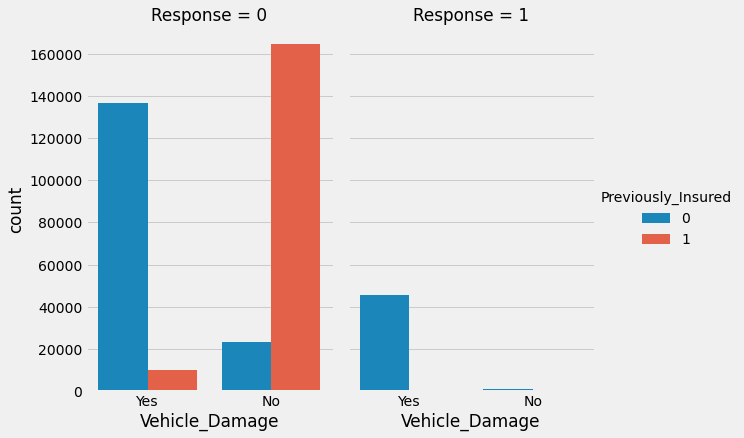

In [28]:
sns.catplot(x="Vehicle_Damage", hue="Previously_Insured", col="Response",
                data=df, kind="count",
                height=6, aspect=.7)
plt.show()

In [29]:
##Observation:

##People who were not previously insured are most likely to response after having Vehicle Damage
##People who were previously insured and had no vehicle damage currently , are most likely to not Response

In [30]:
df.drop(["id","Region_Code","Policy_Sales_Channel"],axis = 1,inplace=True)
df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,217,1
1,Male,76,1,0,1-2 Year,No,33536.0,183,0
2,Male,47,1,0,> 2 Years,Yes,38294.0,27,1
3,Male,21,1,1,< 1 Year,No,28619.0,203,0
4,Female,29,1,1,< 1 Year,No,27496.0,39,0


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Vehicle_Damage"] = le.fit_transform(df["Vehicle_Damage"])

In [32]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,44,1,0,1,40454.0,217,1,1,0,1
1,76,1,0,0,33536.0,183,0,1,0,0
2,47,1,0,1,38294.0,27,1,1,0,1
3,21,1,1,0,28619.0,203,0,1,1,0
4,29,1,1,0,27496.0,39,0,0,1,0


In [33]:
x = df.drop("Response",axis=1)
y = df["Response"]

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

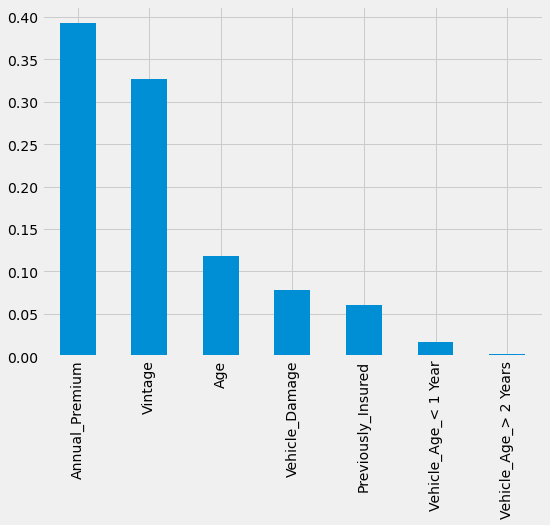

In [35]:
plt.figure(figsize=(8,6))
important_features = pd.Series(model.feature_importances_,index = x.columns)
important_features.nlargest(7).plot(kind = "bar")
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
#pip install lightgbm

In [38]:
#pip install scikit-learn

# Decision Tree

In [39]:
dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth = 100,random_state=0)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=0)

In [40]:
from sklearn.metrics import accuracy_score,classification_report
dt_pred = dt_clf.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt_pred)
dt_accuracy

0.8251817060691139

# Random Forest

In [41]:
rf_clf = RandomForestClassifier(n_estimators = 200,random_state=0)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [42]:
rf_pred = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test,rf_pred)
rf_accuracy

0.8527590459447404

# Logistic Regression

In [43]:
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(x_train,y_train)


LogisticRegression(random_state=0)

In [44]:
lr_pred = lr_clf.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_pred)
lr_accuracy

0.8768990580147464

# KNN

In [45]:
knn_clf = KNeighborsClassifier(n_neighbors=20)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [46]:
knn_pred = knn_clf.predict(x_test)
knn_accuracy = accuracy_score(y_test,knn_pred)
knn_accuracy

0.8767678622969747